# GRADIENT DECENT IN MACHINE LEANING

In [1]:
# WE KNOW THAT EQUATION OF SIMPLE LINE => y=mx+b
#WE KNOW THAT 
#LOSS FUNCTION = Actual_value - Predicted_value
#LOSS WITH RESPECT TO MEAN SQUARED ERROR
#l = 1/n(y_actual - y_predicted)**2
#IF n(features)=1
#l=(y - mx-b)**2

#CASE 1:- LOSS W.R.T intercept(b)
#dl/db = 2(y - mx -b)(d(y)/db - d(mx)/db - db/db)
#dl/db= 2(y-mx-b)(0-0-1)
#dl/db = -2(y-mx-b) .............(1)

#CASE 2:- LOSS W.R.T weights
#dl/dm = 2(y - mx -b)(d(y)/dm - d(mx)/dm - db/dm)
#dl/dm= 2(y-mx-b)(0-x-0)
#dl/dm = -2(y-mx-b) (x).............(2)

#b_new = b_old - leaning_rate * (dl/db) ..........(3)
#m_new = m_old - learning_rate * (dl/dm) ...........(4)

# from equation (3,4) new line will be
# y = m_new*X + b_new  ...........(5)
# IF learning_rate >>>>> 0 then it will be GradientExploading

#IF leaning_rate <<<<<<< 0 THEN IT WILL BE Vnishing Gradient.

In [2]:
import numpy as np

In [5]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import cross_val_score

In [6]:
x,y=make_regression(n_samples = 100 , n_features = 1,
                   n_informative = 1 , n_targets = 1 , noise = 20 , random_state=13)

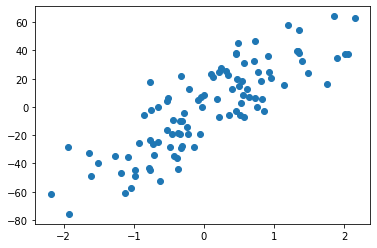

In [7]:
plt.scatter(x,y)

In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [13]:
lr=LinearRegression()

In [15]:
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.271014426178382


In [16]:
#np.mean(cross_val_score(lr,x,y,scoring='r2' , cv=10))
y_pred=lr.predict(x_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_test,y_pred)

0.6345158782661013

In [31]:
class GDRegressor:
    def __init__(self , learning_rate , epochs):
        self.m = 100 # WE CAN STart ANY NUMBER AS LIKE M = 0
        self.b = -120 # WE CAN START ANY NUMBER AS LIKE B = 1
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self , x , y):
        #calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y-self.m*x.ravel()-self.b)
            loss_slope_m = -2*np.sum((y-self.m* x.ravel() - self.b) * x.ravel())
            
            self.b=self.b - (self.lr * loss_slope_b)
            self.m=self.m - (self.lr * loss_slope_m)
        print(self.b , self.m)
        
    def predict(self , x):
        return self.m * x + self.b

In [32]:
gd=GDRegressor(0.001 , 100)

In [33]:
gd.fit(x_train,y_train)

-2.2710234077993587 28.12598618006269


In [34]:
#gd.predict()

In [35]:
y_pred=gd.predict(x_test)
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test , y_pred)

0.634515826773629

# Gradient (stocastic) decent

In [38]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
x,y=load_diabetes(return_X_y=True)
print(x.shape)
print(y.shape)

(442, 10)
(442,)


In [41]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
reg=LinearRegression()

In [44]:
reg.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.6345158782661013

In [52]:
#NOW WE CREATE OUR OWN CLASS
class SGDRegressor:
    def __init__(self , learning_rate = 0.01 , epochs = 100):
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self , x_train , y_train):
        #INIT OUR COEF
        self.intercept_ = 0
        self.coef_ = np .ones(x_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(x_train.shape[0]):
                idx=np.random.randint(0,x_train.shape[0])
                
                y_hat=np.dot(x_train[idx] , self.coef_) + self.intercept_
                
                intercept_der = -2*(y_train[idx]-y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2*np.dot((y_train[idx] - y_hat) , x_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
                
        print(self.intercept_ , self.coef_)
    def predict(self , x_test):
        return np.dot(x_test , self.coef_) + self.intercept_

In [53]:
sgd=SGDRegressor(learning_rate=0.01 , epochs=50)

In [54]:
sgd.fit(x_train,y_train)

-5.711613442905799 [25.95267213]


In [55]:
y_pred = sgd.predict(x_test)

In [56]:
y_pred

array([ 15.85260866,  13.02530898,  13.21217895, -11.09289218,
        10.89508552,  50.09657066, -17.48770022, -14.0715831 ,
       -18.20448797, -11.74368589, -25.36954866,  10.02319728,
         8.10397723, -25.6595385 , -24.20005472, -18.99847567,
        19.016887  , -19.28912278,  -7.20473264, -14.70698576])

In [57]:
r2_score(y_test,y_pred)

0.6194350842004028

# BY THE HELP OF SKLEARN SGDREGRESSOR

In [58]:
from sklearn.linear_model import SGDRegressor 

In [59]:
reg = SGDRegressor(max_iter=60 , learning_rate = 'constant' , eta0 = 0.01) 


In [61]:
reg.fit(x_train , y_train) 

SGDRegressor(learning_rate='constant', max_iter=60)

In [63]:
y_pred = reg.predict(x_test) 

In [65]:
r2_score(y_test , y_pred) 

0.6334500421317346